# Import

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Import file

In [20]:
immo_df = pd.read_csv("data/immo.csv")
immo_df.head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0        2072    -119.84     36.77                 6.0       1853.0   
1       10600    -117.80     33.68                 8.0       2032.0   
2        2494    -120.19     36.60                25.0        875.0   
3        4284    -118.32     34.10                31.0        622.0   
4       16541    -121.23     37.79                21.0       1922.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           473.0      1397.0       417.0         1.4817             72000.0   
1           349.0       862.0       340.0         6.9133            274100.0   
2           214.0       931.0       214.0         1.5536             58300.0   
3           229.0       597.0       227.0         1.5284            200000.0   
4           373.0      1130.0       372.0         4.0815            117900.0   

  ocean_proximity  
0          INLAND  
1       <1H OCEAN  
2          INLAND  
3       <1H OCEAN  
4          INLAND

# Data exploration

## First data exploration

In [21]:
immo_df.describe()

Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
mean   10295.498789   -119.564046     35.626523           28.624516   
std     5941.973488      2.005033      2.139150           12.597980   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5178.750000   -121.790000     33.930000           18.000000   
50%    10263.500000   -118.490000     34.250000           29.000000   
75%    15438.250000   -118.010000     37.710000           37.000000   
max    20639.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  16512.000000    16336.000000  16512.000000  16512.000000   
mean    2644.170603      539.319540   1435.017260    501.135962   
std     2213.946369      425.207704   1158.151967    385.650673   
min        6.000000        2.000000      3.000000      2.000000   
25%     1446.000000      296.000000    788.000000    280.000000   
50%     2116.000000      435.000000   1168.000000    410.000000   
75%     3154.000000      647.000000   1738.000000    606.000000   
max    39320.000000     6445.000000  35682.000000   6082.000000   

       median_income  median_house_value  
count   16512.000000        16512.000000  
mean        3.864091       206509.251453  
std         1.893244       115225.957661  
min         0.499900        14999.000000  
25%         2.562500       119400.000000  
50%         3.531300       179300.000000  
75%         4.733225       264500.000000  
max        15.000100       500001.000000

In [22]:
immo_df.isna().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
immo_df.shape

(16512, 11)

In [24]:
immo_df= immo_df.dropna()
immo_df.isna().sum()


Unnamed: 0            0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [25]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16336 rows x 11 columns]

In [26]:
immo_df.shape

(16336, 11)

## First data visualisation

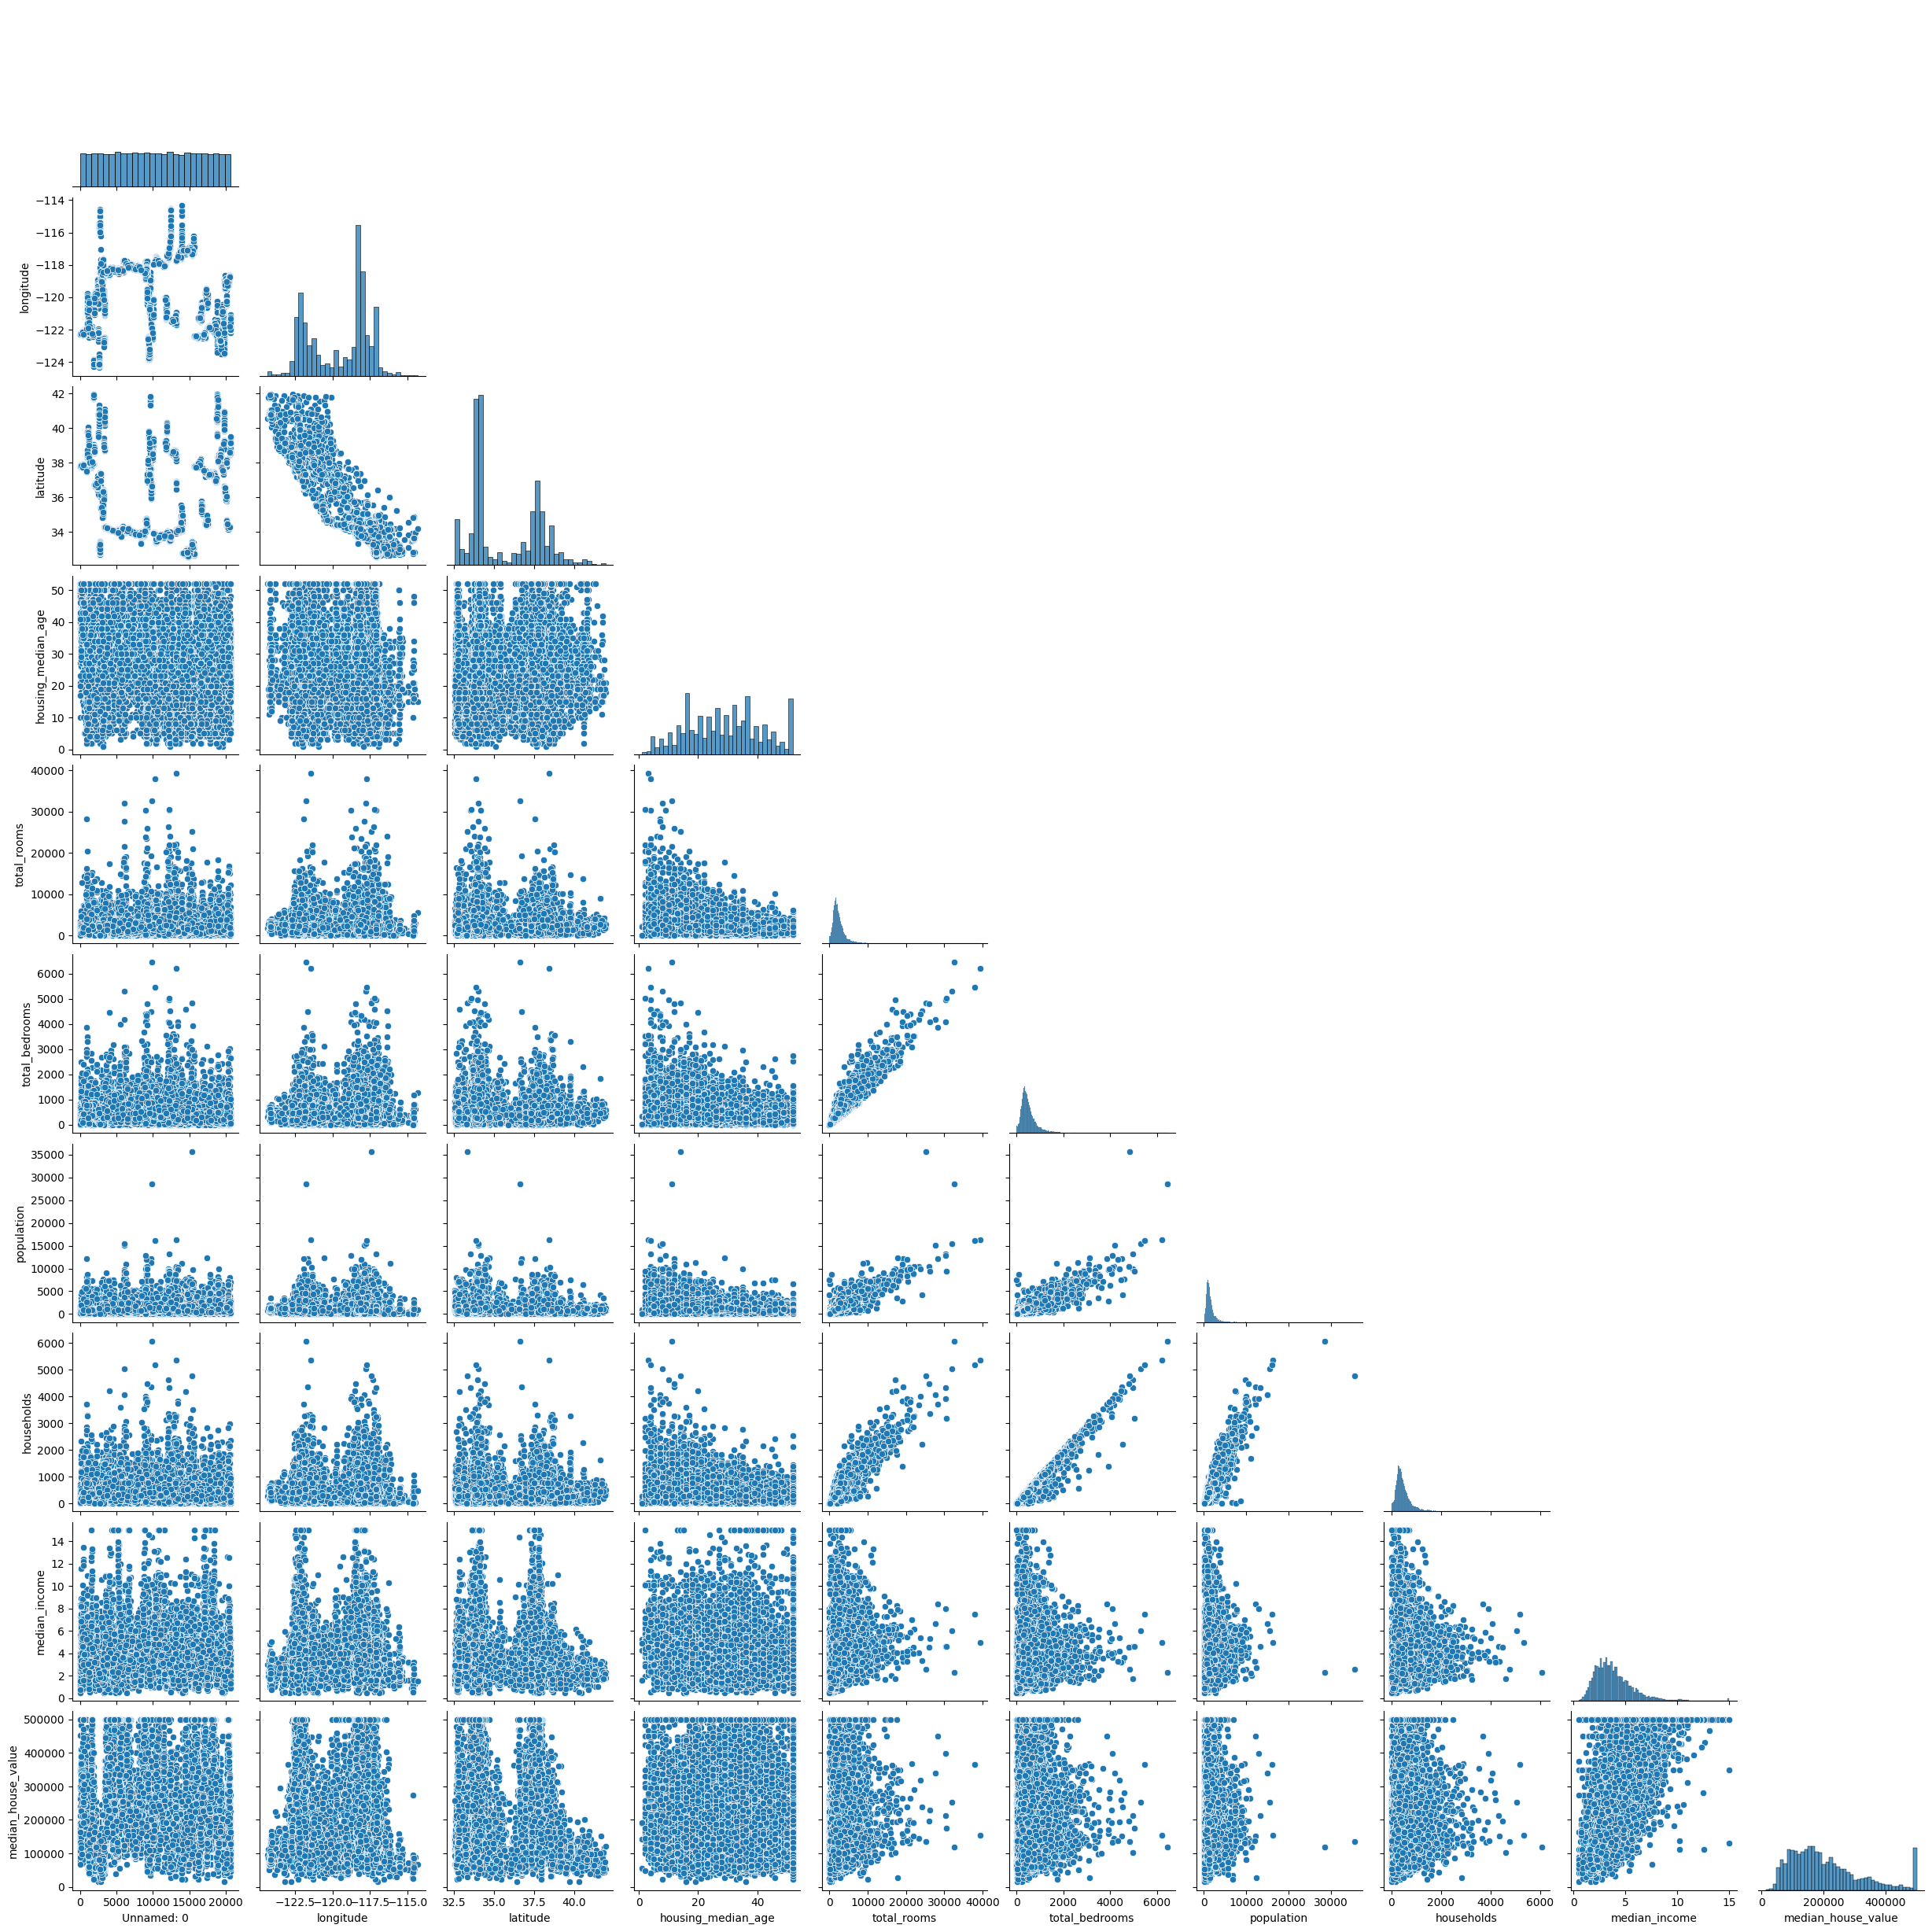

In [27]:
sns.pairplot(immo_df,corner= True)
plt.show()

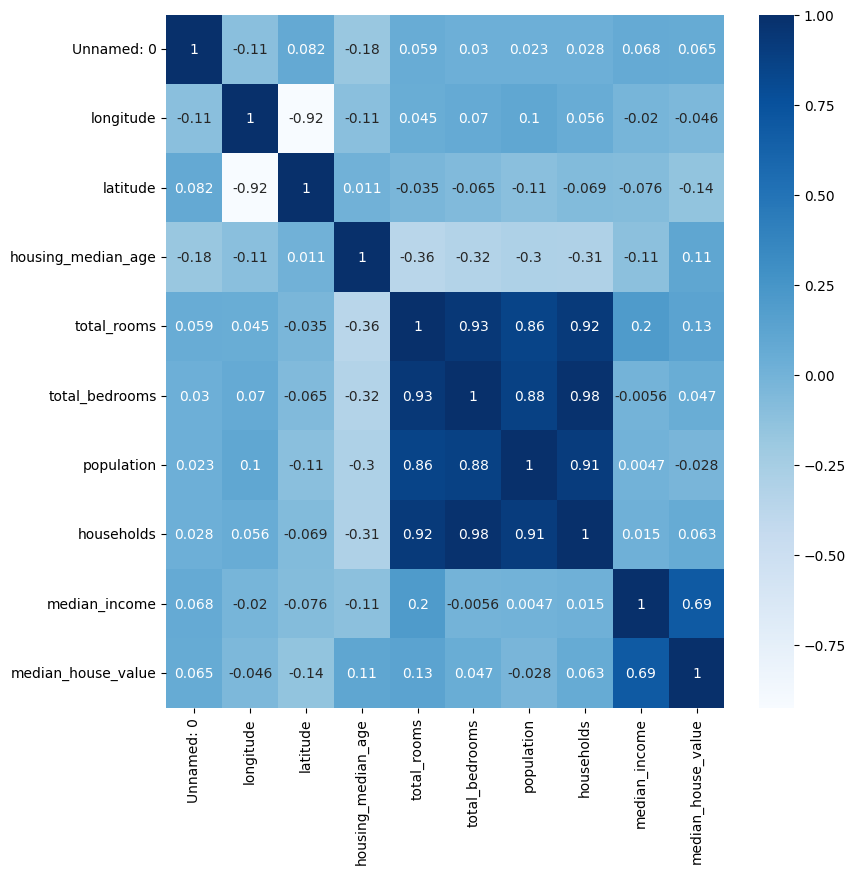

In [28]:
plt.figure(figsize=(9,9))
cor = immo_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [29]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16336 rows x 11 columns]

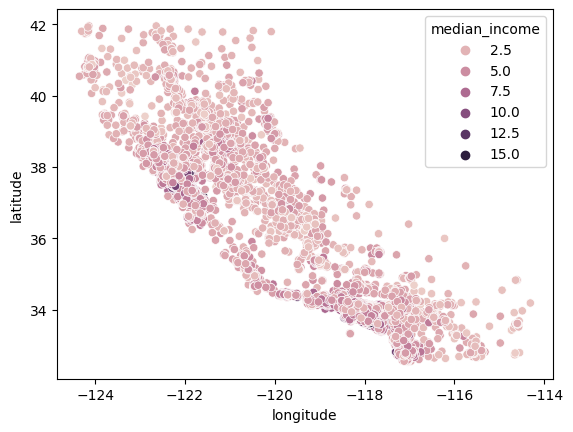

In [30]:
sns.scatterplot(data = immo_df, x = "longitude",y="latitude", hue = "median_income")
plt.show()

In [31]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16336 rows x 11 columns]

In [32]:
fig = px.scatter_mapbox(immo_df, lat="latitude", lon="longitude", color = "median_house_value",zoom=4.1, mapbox_style="carto-positron")
fig.update_layout(
    showlegend=False,
    font={'size': 15},
    title={'text': '<b>Median house value in California</b>', 'font': {'size': 20}},
    title_x = 0.45,
)
fig.show()

# First iteration

# Second iteration

## Ocean_proximity encoding

In [33]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16336 rows x 11 columns]

In [34]:
#immo_df = immo_df["ocean_proximity"].replace({})

# Third iteration

## Normalization

In [35]:
immo_df_without_ocean = immo_df.drop("ocean_proximity",axis=1)
scaler = StandardScaler()
print(scaler.fit(immo_df_without_ocean))
scale_immo = scaler.transform(immo_df_without_ocean)
scale_immo_df = pd.DataFrame(scale_immo,columns=immo_df_without_ocean.columns)
scale_immo_df.head()

StandardScaler()


Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0   -1.383928  -0.137251  0.533794           -1.794454    -0.356850   
1    0.051851   0.880088 -0.910190           -1.635811    -0.276133   
2   -1.312879  -0.311794  0.454351           -0.287346    -0.797862   
3   -1.011514   0.620766 -0.713920            0.188583    -0.911947   
4    1.052080  -0.830437  1.010449           -0.604632    -0.325736   

   total_bedrooms  population  households  median_income  median_house_value  
0       -0.155975   -0.032086   -0.217734      -1.258728           -1.166420  
1       -0.447606   -0.493819   -0.417498       1.611634            0.586995  
2       -0.765107   -0.434269   -0.744384      -1.220732           -1.285281  
3       -0.729829   -0.722528   -0.710658      -1.234049           -0.055895  
4       -0.391161   -0.262521   -0.334479       0.115152           -0.768193

In [36]:
scale_immo_df["ocean_proximity"]= immo_df["ocean_proximity"]
scale_immo_df.isnull().sum()
scale_immo_df = scale_immo_df.dropna()
scale_immo_df.head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0   -1.383928  -0.137251  0.533794           -1.794454    -0.356850   
1    0.051851   0.880088 -0.910190           -1.635811    -0.276133   
2   -1.312879  -0.311794  0.454351           -0.287346    -0.797862   
3   -1.011514   0.620766 -0.713920            0.188583    -0.911947   
4    1.052080  -0.830437  1.010449           -0.604632    -0.325736   

   total_bedrooms  population  households  median_income  median_house_value  \
0       -0.155975   -0.032086   -0.217734      -1.258728           -1.166420   
1       -0.447606   -0.493819   -0.417498       1.611634            0.586995   
2       -0.765107   -0.434269   -0.744384      -1.220732           -1.285281   
3       -0.729829   -0.722528   -0.710658      -1.234049           -0.055895   
4       -0.391161   -0.262521   -0.334479       0.115152           -0.768193   

  ocean_proximity  
0          INLAND  
1       <1H OCEAN  
2          INLAND  
3       <1H OCEAN  
4          INLAND

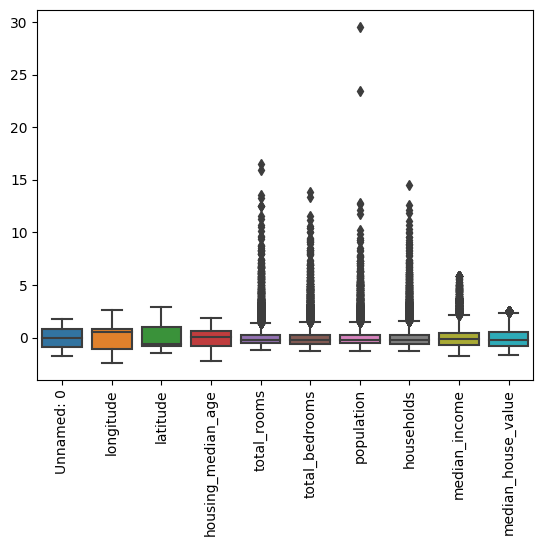

In [37]:
sns.boxplot(data = scale_immo_df)
plt.xticks(rotation=90)
plt.show()

# Fourth iteration

## Outliers

### Scaled data

In [38]:
treshold = 2
scale_immo_without_outliers =scale_immo_df[(np.abs(stats.zscore(scale_immo_df['total_rooms'])) < treshold)] 
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['total_bedrooms'])) < treshold)]
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['population'])) < treshold)]
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['households'])) < treshold)]
scale_immo_without_outliers =scale_immo_without_outliers[(np.abs(stats.zscore(scale_immo_without_outliers['median_income'])) < treshold)]

In [39]:
scale_immo_without_outliers.shape

(13002, 11)

Choix de 3 et pas 2 : vire 2000 de plus

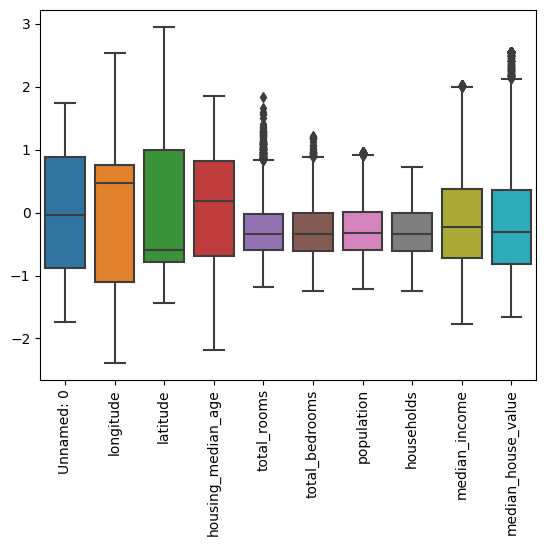

In [40]:
sns.boxplot(data = scale_immo_without_outliers)
plt.xticks(rotation=90)
plt.show()

# Fifth iteration

## Statistics

### Unscaled data

In [41]:
immo_without_outliers = immo_df[(np.abs(stats.zscore(immo_df['total_rooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['longitude'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['latitude'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['housing_median_age'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['total_rooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['total_bedrooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['population'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['households'])) < treshold)]

In [42]:
best_columns = "+".join(['longitude', 'latitude', 'housing_median_age',"total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"])
model_patsy = ols(f'median_house_value ~ {best_columns}', data=immo_df).fit()

anova_table = sm.stats.anova_lm(model_patsy, typ=2)
anova_table

sum_sq       df             F         PR(>F)
ocean_proximity     2.150135e+12      4.0    114.751589   1.133421e-96
longitude           2.493650e+12      1.0    532.339158  6.222528e-116
latitude            2.345818e+12      1.0    500.780387  2.814921e-109
housing_median_age  2.211459e+12      1.0    472.097809  3.235615e-103
total_rooms         2.421586e+11      1.0     51.695517   6.761843e-13
total_bedrooms      7.640370e+11      1.0    163.105043   3.574451e-37
population          4.803250e+12      1.0   1025.387887  2.904017e-218
households          1.908710e+11      1.0     40.746755   1.779660e-10
median_income       5.019688e+13      1.0  10715.926626   0.000000e+00
Residual            7.646223e+13  16323.0           NaN            NaN

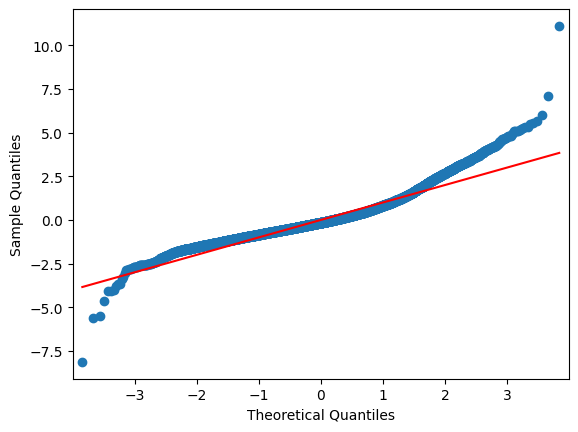

In [44]:
# Plot
pplot = sm.ProbPlot(model_patsy.resid, fit = True)
pplot.qqplot(line = 's')
plt.show()

In [ ]:
stats.shapiro(model_patsy.resid)

In [ ]:
shapiro_test = stats.shapiro(immo_df_without_ocean)
shapiro_test

In [ ]:
Homogeneity of Variances using Lavene's test
Null Hypothesis(H0) - Homogenous Variance
Alternate Hypothesis(HA) - Non Homogenous variance

- visualisation de données autre 
- catégories pour l'ocean 
- anova
- MI
- Khi 2 
- modèle 
- créer des features

# Sixth iteration